In [1]:
#import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
ords_prods_merge = pd.read_pickle(r'/Volumes/My Passport/orders_products_merge_new.pkl')

In [3]:
# viewing all columns

pd.set_option("display.max_columns",None)

In [4]:
ords_prods_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,busiest_day,busiest_period_of_day,max_orders,loyalty_flag,mean_order,spender_flag,frequency,order_frequency_flag,first_name,last_name,gender,state,age,date_joined,n_dependants,fam_status,income
0,2539329,1,1,2,8,NaN,196,1,0,both,Soda,77.0,7.0,9.0,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2539329,1,1,2,8,NaN,14084,2,0,both,Organic Unsweetened Vanilla Almond Milk,91.0,16.0,12.5,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,2539329,1,1,2,8,NaN,12427,3,0,both,Original Beef Jerky,23.0,19.0,4.4,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2539329,1,1,2,8,NaN,26088,4,0,both,Aged White Cheddar Popcorn,23.0,19.0,4.7,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,2539329,1,1,2,8,NaN,26405,5,0,both,XL Pick-A-Size Paper Towel Rolls,54.0,17.0,1.0,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


# PII Security

In [5]:
# dropping columns for confidentaility

ords_prods_merge.drop(columns = ['first_name','last_name'])

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,busiest_day,busiest_period_of_day,max_orders,loyalty_flag,mean_order,spender_flag,frequency,order_frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income
0,2539329,1,1,2,8,NaN,196,1,0,both,Soda,77.0,7.0,9.0,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2539329,1,1,2,8,NaN,14084,2,0,both,Organic Unsweetened Vanilla Almond Milk,91.0,16.0,12.5,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,2539329,1,1,2,8,NaN,12427,3,0,both,Original Beef Jerky,23.0,19.0,4.4,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2539329,1,1,2,8,NaN,26088,4,0,both,Aged White Cheddar Popcorn,23.0,19.0,4.7,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,2539329,1,1,2,8,NaN,26405,5,0,both,XL Pick-A-Size Paper Towel Rolls,54.0,17.0,1.0,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32435054,2977660,206209,13,1,12,7.0,14197,5,1,both,Tomato Paste,9.0,9.0,5.6,Busiest days,Most orders,13,Regular customer,7.058915,Low spender,22.0,Non-frequent customer,Female,Iowa,74,9/14/2019,3,married,137969
32435055,2977660,206209,13,1,12,7.0,38730,6,0,both,Brownie Crunch High Protein Bar,3.0,19.0,5.9,Busiest days,Most orders,13,Regular customer,7.058915,Low spender,22.0,Non-frequent customer,Female,Iowa,74,9/14/2019,3,married,137969
32435056,2977660,206209,13,1,12,7.0,31477,7,0,both,High Protein Bar Chunky Peanut Butter,3.0,19.0,4.2,Busiest days,Most orders,13,Regular customer,7.058915,Low spender,22.0,Non-frequent customer,Female,Iowa,74,9/14/2019,3,married,137969
32435057,2977660,206209,13,1,12,7.0,6567,8,0,both,Chocolate Peanut Butter Protein Bar,3.0,19.0,4.9,Busiest days,Most orders,13,Regular customer,7.058915,Low spender,22.0,Non-frequent customer,Female,Iowa,74,9/14/2019,3,married,137969


In [6]:
#deleting unnecessary column

del ords_prods_merge['_merge']

# Regional Columns

In [4]:
# creating 'region' column

result = []

for state in ords_prods_merge['state']:
    if (state == "Maine") or (state == "New Hampshire") or (state == "Vermont") or (state == "Massachusetts") or (state == "Rhode Island") or (state == "Connecticut") or (state == "New York") or (state == "Pennsylvania") or (state == "New Jersey"):
        result.append("Northeast")
    elif  (state == "Wisconsin") or (state == "Michigan") or  (state == "Illinois") or (state == "Indiana") or (state == "Ohio") or (state == "North Dakota") or (state == "South Dakota") or (state == "Nebraska") or (state == "Kansas") or (state == "Minnesota") or (state == "Iowa") or (state == "Missouri"):
        result.append("Midwest")
    elif (state == "Delaware") or (state == "Maryland") or (state == "District of Columbia") or (state == "Virginia") or (state == "West Virginia") or (state == "North Carolina") or (state == "South Carolina") or (state == "Georgia") or (state == "Florida") or (state == "Kentucky") or (state == "Tennessee") or (state == "Mississippi") or (state == "Alabama") or (state == "Oklahoma") or (state == "Texas") or (state == "Arkansas") or (state == "Louisiana"):
        result.append("South")
    else:
        result.append("West")

In [5]:
ords_prods_merge['region'] = result

In [6]:
ords_prods_merge['region'].value_counts(dropna = False)

South        10801982
West          8300617
Midwest       7604016
Northeast     5728444
Name: region, dtype: int64

# Crosstab

In [15]:
# crosstab spender & region

crosstab = pd.crosstab(ords_prods_merge['region'], ords_prods_merge['spender_flag'], dropna = False)

In [11]:
crosstab.to_clipboard()

### Both low and high spenders are in the South region. This tells us that majority of Instacart customers are in the South region.

# Low Activity Customers

In [7]:
# creating exclusion flag for low activity customers

ords_prods_merge.loc[ords_prods_merge['max_orders'] < 5, 'activity'] = 'Low'

In [8]:
# creating exclusion flag for high activity customers

ords_prods_merge.loc[ords_prods_merge['max_orders'] > 5, 'activity'] = 'High'

In [9]:
# exporting a sample of high activity customers

df = ords_prods_merge[ords_prods_merge['max_orders'] > 5]

# Family Profiles

In [19]:
# crosstabs on family status and items purchased

crosstab_2 = pd.crosstab(df['fam_status'], df['department_id'], dropna = False)
crosstab_2.to_clipboard()

In [20]:
# crosstabs on age and items purchased

crosstab_3 = pd.crosstab(df['age'], df['department_id'], dropna = False)
crosstab_3.to_clipboard()

In [18]:
# what time is most money spent

crosstab_4 = pd.crosstab(df['prices'].sum(), df['order_hour_of_day'], dropna = False)
crosstab_4.to_clipboard()

In [19]:
# which day is most money spent

crosstab_5 = pd.crosstab(df['prices'].sum(), df['orders_day_of_week'], dropna = False)
crosstab_5.to_clipboard()

In [20]:
# which family status spends the most

crosstab_6 = pd.crosstab(df['prices'].sum(), df['fam_status'], dropna = False)
crosstab_6.to_clipboard()

# Visualizations

In [14]:
# creating random sample

np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [15]:
# splitting the sample into two

big = df[dev]
small = df[~dev]

In [16]:
len(big) + len(small)

30199644

In [17]:
len(df)

30199644

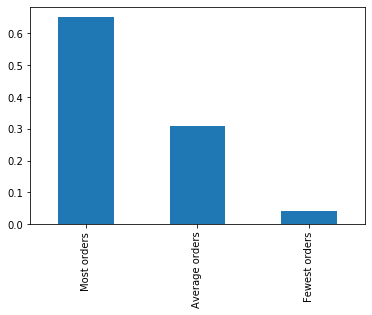

In [22]:
bar_3 = df['busiest_period_of_day'].value_counts('orders_day_of_week').plot.bar()

In [25]:
df_2 = small[['orders_day_of_week', 'prices']]

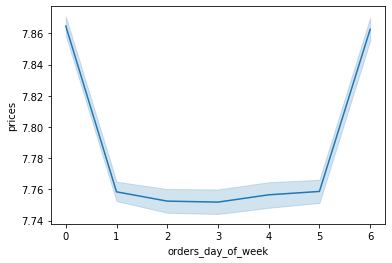

In [26]:
# lineplot of which day most money is spent

line = sns.lineplot(data = df_2, x = 'orders_day_of_week', y = 'prices')

In [27]:
line.figure.savefig('prices_vs_day.png')

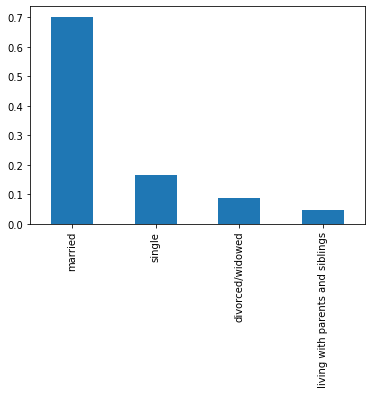

In [28]:
# how family status impacts amount spent

bar = df['fam_status'].value_counts('prices').plot.bar()

In [29]:
bar.figure.savefig('status_vs_price.png')

In [23]:
# fam status and number of items purchased

bar_2 = df.groupby(['department_id', 'fam_status'])['department_id'].count().unstack('fam_status').fillna(0)

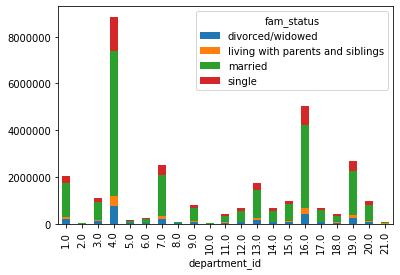

In [24]:
bar_2.plot(kind = 'bar', stacked = True)

In [22]:
# loyalty customers spending habits

bar_6 = df.groupby(['department_id', 'loyalty_flag'])['department_id'].count().unstack('loyalty_flag').fillna(0)

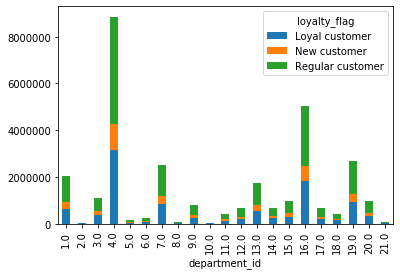

In [23]:
bar_6.plot(kind = 'bar', stacked = True)

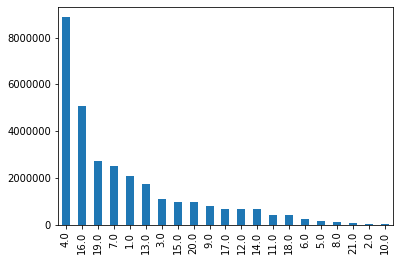

In [30]:
# most popular departments

bar_3 = df['department_id'].value_counts('prices').plot.bar()

In [31]:
bar_3.figure.savefig('department_id.png')

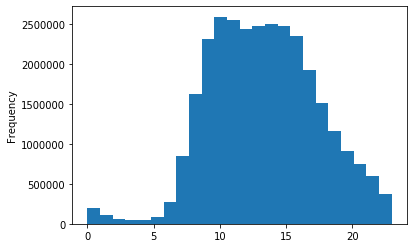

In [31]:
# the busiest hour of the day

hist = df['order_hour_of_day'].plot.hist(bins = 24)

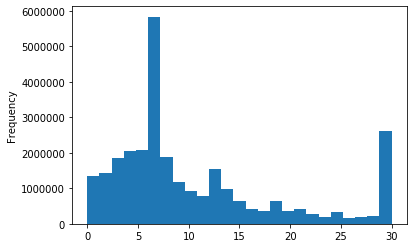

In [26]:
# the loyalty of returning customers

hist_2 = df['days_since_prior_order'].plot.hist(bins = 25)

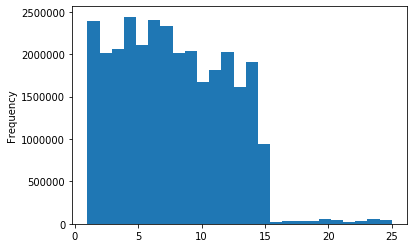

In [25]:
# viewing the range of prices for items

hist_1 = df['prices'].plot.hist(bins = 25)

# Aggregation

In [28]:
# grouping users by expenditure

df.groupby('user_id').agg({'prices':['mean', 'min', 'max']})

prices           
             mean  min   max
user_id                     
1        6.367797  1.0  14.0
2        7.515897  1.3  14.8
3        8.197727  1.3  14.4
7        7.466990  1.1  23.2
11       8.328723  1.4  14.7
...           ...  ...   ...
206202   8.156061  1.0  17.1
206206   7.646667  1.1  14.8
206207   7.313453  1.2  24.7
206208   8.366617  1.1  21.6
206209   7.058915  1.1  18.8

[146468 rows x 3 columns]

In [29]:
# grouping users by frequency

df.groupby('user_id').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                          mean  min   max
user_id                                  
1                    20.259259  0.0  30.0
2                    15.967033  3.0  30.0
3                    11.487179  7.0  21.0
7                    13.546392  2.0  30.0
11                   19.320988  7.0  30.0
...                        ...  ...   ...
206202               12.093750  3.0  30.0
206206                4.042705  0.0  15.0
206207               14.879397  1.0  30.0
206208                7.442105  0.0  20.0
206209               20.275862  3.0  30.0

[146468 rows x 3 columns]

# Comparing Profiles

In [18]:
# regions and number of items purchased

bar_4 = df.groupby(['department_id', 'region'])['department_id'].count().unstack('region').fillna(0)

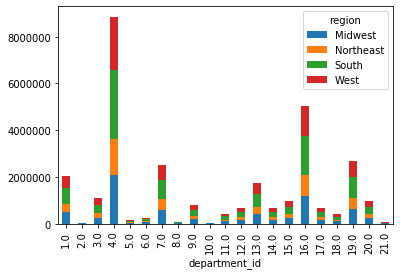

In [19]:
bar_4.plot(kind = 'bar', stacked = True)

In [28]:
# spending habits of people with dependants

bar_7 = df.groupby(['department_id', 'n_dependants'])['department_id'].count().unstack('n_dependants').fillna(0)

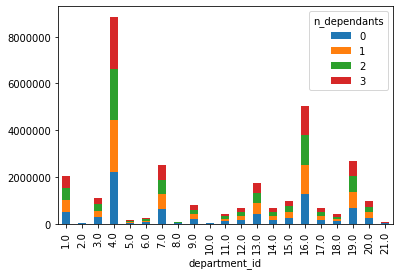

In [29]:
bar_7.plot(kind = 'bar', stacked = True)

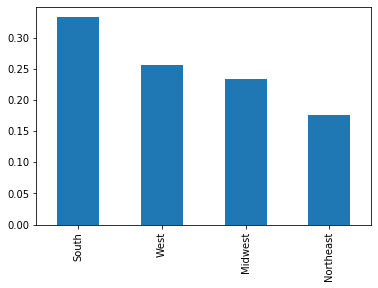

In [21]:
# regions spending habits

bar_5 = df['region'].value_counts('prices').plot.bar()

In [10]:
# exporting file

df.to_pickle(r'/Volumes/My Passport/orders_products_all')